In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

np.set_printoptions(suppress=True)

In [3]:
from stocks import Stocks
from agents.dsrqn import DSRQN
from environment import Env
from simulation import Simulation
from utils import *
from visualizations import *

Using TensorFlow backend.


In [6]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Input, Lambda, Reshape, Flatten, MaxPooling2D, AveragePooling1D, LSTM, concatenate
from keras.optimizers import Adam
from keras import backend as K
from scipy.special import softmax

In [7]:
stocks = Stocks(['AAPL', 'BA', 'GE'], start='2012-1-1', end='2017-1-1')
agent  = DSRQN()
env    = Env(stocks=stocks)
env._counter = 30

action_size = len(env.universe)

env.state.shape

(1, 30, 3)

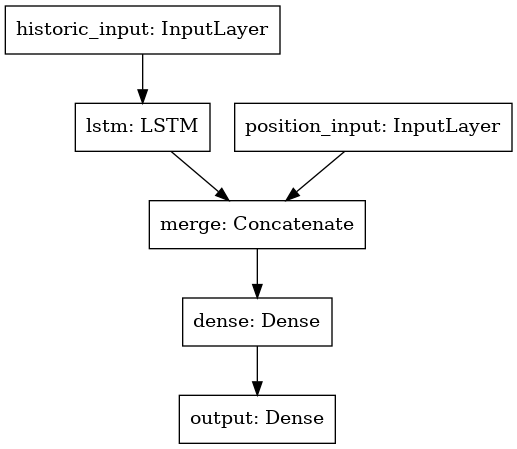

In [8]:
historic_input = Input(shape=(None, (action_size-1)), name='historic_input')
position_input = Input(shape=(action_size,), name='position_input')

lstm = LSTM(32, activation='relu', name='lstm')(historic_input)

x = concatenate([lstm, position_input], name='merge')

fc = Dense(32, activation='relu', name='dense')(x)

y = Dense(action_size, activation='linear', name='output')(fc)

# model = Model(X, y)
model = Model(inputs=[historic_input, position_input], outputs=y)

model.compile(loss='mse', optimizer=Adam(lr=0.001))

from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [9]:
model.fit([env.state, np.array([[0.1,0.2,0.2,0.5]])], np.array([[0.1,0.2,0.2,0.5]]))

Epoch 1/1
1/1 [==============================] - 0s 293ms/step - loss: 0.1075


In [10]:
model.predict([env.state, np.array([[0.1,0.2,0.2,0.5]])])

array([[ 0.07439261, -0.10261533,  0.06550945, -0.04639372]],
      dtype=float32)